## CIBO tutorial


In this tuturial we will show how to prepare your own datasets containing a list of procured reactions and inventory prices to perform a cost-informed Bayesian optimization.

First, we will inspect the processed direct arylation dataset.

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from datasets import directaryl
import torch
import copy as cp
from BO import update_model
from data.datasets import Evaluation_data


reaction_data = directaryl()

As you can see the dataset contains quite a lot of information. In particular the ligand price in [$/gram] in the `Ligand_Cost_fixed` column.

In [2]:
reaction_data.data

,Ligand_inchi,Base_inchi,Solvent_inchi,Product_inchi,Electrophile_inchi,Nucleophile_inchi,Precatalyst_inchi,Base,Electrophile,Electrophile_PCI_Name,...,Electrophile_mg,Precatalyst_mg,Ligand_mg,Base_mg,Total_mg,PMI,Ligand_Cost_fixed,Base_SMILES,Ligand_SMILES,Solvent_SMILES
0,InChI=1S/C24H39O2P/c1-18(2)25-22-16-11-17-23(2...,"InChI=1S/C2H4O2.K/c1-2(3)4;/h1H3,(H,3,4);/q;+1...","InChI=1S/C8H10/c1-7-3-5-8(2)6-4-7/h3-6H,1-2H3",InChI=1S/C11H8FN3/c1-15-7-14-10(6-13)11(15)8-4...,InChI=1S/C6H4BrF/c7-5-3-1-2-4-6(5)8/h1-4H,"InChI=1S/C5H5N3/c1-8-3-5(2-6)7-4-8/h3-4H,1H3","InChI=1S/2C3H5.2ClH.2Pd/c2*1-3-2;;;;/h2*3H,1-2...",KOAc,1-Bromo-2-fluorobenzene,7,...,2.625,0.123474,0.339202,4.41630,139.742507,5578.565900,36.0,CC(=O)[O-].[K+],CC(C)Oc1cccc(OC(C)C)c1P(C1CCCCC1)C1CCCCC1,Cc1ccc(C)cc1
1,"InChI=1S/C16H21O3P/c1-13-10-15(3)19-14(2,17-13...","InChI=1S/C2H4O2.K/c1-2(3)4;/h1H3,(H,3,4);/q;+1...","InChI=1S/C8H10/c1-7-3-5-8(2)6-4-7/h3-6H,1-2H3",InChI=1S/C11H8FN3/c1-15-7-14-10(6-13)11(15)8-4...,InChI=1S/C6H4BrF/c7-5-3-1-2-4-6(5)8/h1-4H,"InChI=1S/C5H5N3/c1-8-3-5(2-6)7-4-8/h3-4H,1H3","InChI=1S/2C3H5.2ClH.2Pd/c2*1-3-2;;;;/h2*3H,1-2...",KOAc,1-Bromo-2-fluorobenzene,7,...,2.625,0.123474,0.219232,4.41630,141.008430,99.939136,144.0,CC(=O)[O-].[K+],CC12CC3(C)OC(C)(CC(C)(O1)P3c1ccccc1)O2,Cc1ccc(C)cc1
2,InChI=1S/C35H53O2P/c1-23(2)26-21-29(24(3)4)33(...,"InChI=1S/C5H10O2.K/c1-5(2,3)4(6)7;/h1-3H3,(H,6...","InChI=1S/C4H7N/c1-2-3-4-5/h2-3H2,1H3",InChI=1S/C11H8FN3/c1-15-7-14-10(6-13)11(15)8-4...,InChI=1S/C6H4BrF/c7-5-3-1-2-4-6(5)8/h1-4H,"InChI=1S/C5H5N3/c1-8-3-5(2-6)7-4-8/h3-4H,1H3","InChI=1S/2C3H5.2ClH.2Pd/c2*1-3-2;;;;/h2*3H,1-2...",KOPiv,1-Bromo-2-fluorobenzene,7,...,2.625,0.123474,0.402577,6.30990,92.296715,51.876966,297.0,CC(C)(C)C(=O)[O-].[K+],COc1ccc(OC)c(P(C2CCCCC2)C2CCCCC2)c1-c1c(C(C)C)...,CCCC#N
3,InChI=1S/C39H37F12O2P/c1-19(2)22-11-29(20(3)4)...,"InChI=1S/C2H4O2.Cs/c1-2(3)4;/h1H3,(H,3,4);/q;+...","InChI=1S/C8H10/c1-7-3-5-8(2)6-4-7/h3-6H,1-2H3",InChI=1S/C11H8FN3/c1-15-7-14-10(6-13)11(15)8-4...,InChI=1S/C6H4BrF/c7-5-3-1-2-4-6(5)8/h1-4H,"InChI=1S/C5H5N3/c1-8-3-5(2-6)7-4-8/h3-4H,1H3","InChI=1S/2C3H5.2ClH.2Pd/c2*1-3-2;;;;/h2*3H,1-2...",CsOAc,1-Bromo-2-fluorobenzene,7,...,2.625,0.123474,0.597495,8.63775,241.707352,1243.586857,552.0,CC(=O)[O-].[Cs+],COc1ccc(OC)c(P(c2cc(C(F)(F)F)cc(C(F)(F)F)c2)c2...,Cc1ccc(C)cc1
4,InChI=1S/C35H53O2P/c1-23(2)26-21-29(24(3)4)33(...,"InChI=1S/C5H10O2.Cs/c1-5(2,3)4(6)7;/h1-3H3,(H,...",InChI=1S/C4H9NO/c1-4(6)5(2)3/h1-3H3,InChI=1S/C11H8FN3/c1-15-7-14-10(6-13)11(15)8-4...,InChI=1S/C6H4BrF/c7-5-3-1-2-4-6(5)8/h1-4H,"InChI=1S/C5H5N3/c1-8-3-5(2-6)7-4-8/h3-4H,1H3","InChI=1S/2C3H5.2ClH.2Pd/c2*1-3-2;;;;/h2*3H,1-2...",CsOPiv,1-Bromo-2-fluorobenzene,7,...,2.625,0.123474,0.402577,10.53135,263.474829,inf,297.0,CC(C)(C)C(=O)[O-].[Cs+],COc1ccc(OC)c(P(C2CCCCC2)C2CCCCC2)c1-c1c(C(C)C)...,CC(=O)N(C)C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,InChI=1S/C18H15P/c1-4-10-16(11-5-1)19(17-12-6-...,"InChI=1S/C2H4O2.K/c1-2(3)4;/h1H3,(H,3,4);/q;+1...","InChI=1S/C6H12O2/c1-3-4-5-8-6(2)7/h3-5H2,1-2H3",InChI=1S/C11H8FN3/c1-15-7-14-10(6-13)11(15)8-4...,InChI=1S/C6H4BrF/c7-5-3-1-2-4-6(5)8/h1-4H,"InChI=1S/C5H5N3/c1-8-3-5(2-6)7-4-8/h3-4H,1H3","InChI=1S/2C3H5.2ClH.2Pd/c2*1-3-2;;;;/h2*3H,1-2...",KOAc,1-Bromo-2-fluorobenzene,7,...,2.625,0.123474,0.196717,4.41630,96.891433,2309.631575,1.0,CC(=O)[O-].[K+],c1ccc(P(c2ccccc2)c2ccccc2)cc1,CCCCOC(C)=O
1724,InChI=1S/C24H39O2P/c1-18(2)25-22-16-11-17-23(2...,"InChI=1S/C5H10O2.Cs/c1-5(2,3)4(6)7;/h1-3H3,(H,...",InChI=1S/C4H9NO/c1-4(6)5(2)3/h1-3H3,InChI=1S/C11H8FN3/c1-15-7-14-10(6-13)11(15)8-4...,InChI=1S/C6H4BrF/c7-5-3-1-2-4-6(5)8/h1-4H,"InChI=1S/C5H5N3/c1-8-3-5(2-6)7-4-8/h3-4H,1H3","InChI=1S/2C3H5.2ClH.2Pd/c2*1-3-2;;;;/h2*3H,1-2...",CsOPiv,1-Bromo-2-fluorobenzene,7,...,2.625,0.123474,0.339202,10.53135,263.745553,789.422783,36.0,CC(C)(C)C(=O)[O-].[Cs+],CC(C)Oc1cccc(OC(C)C)c1P(C1CCCCC1)C1CCCCC1,CC(=O)N(C)C
1725,InChI=1S/C13H13P/c1-14(12-8-4-2-5-9-12)13-10-6...,"InChI=1S/C2H4O2.Cs/c1-2(

Next we will inspect the ligands in this dataset as well as the prices that were extracted from supplier websites;

There are 11 unique ligands in the dataset


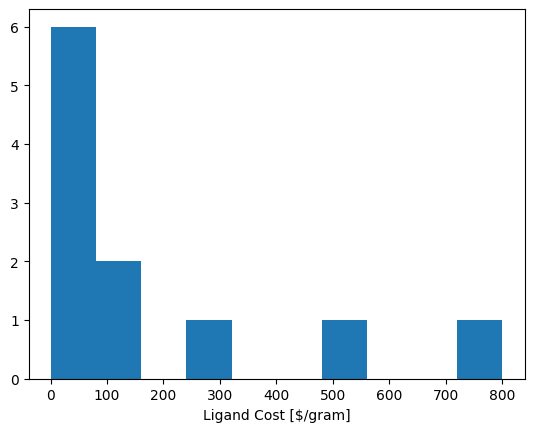

In [3]:
unique_ligands = np.unique(reaction_data.data["Ligand_Cost_fixed"].values)
unique_smiles = [
    reaction_data.data[reaction_data.data["Ligand_Cost_fixed"] == ligand][
        "Ligand_SMILES"
    ].values[0]
    for ligand in unique_ligands
]

print("There are", len(unique_ligands), "unique ligands in the dataset")

plt.hist(unique_ligands)
plt.xlabel("Ligand Cost [$/gram]")
plt.show()

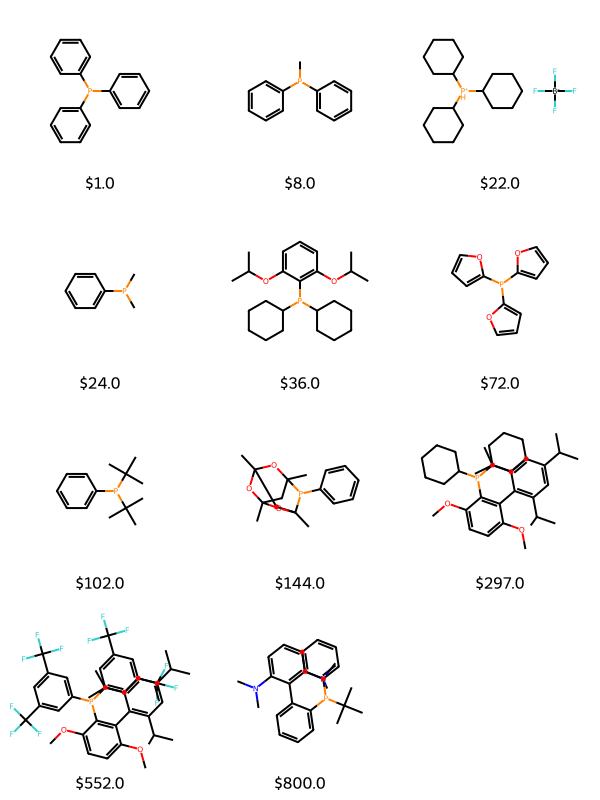

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor


# Generate molecules from SMILES and compute 2D coordinates
molecules = [Chem.MolFromSmiles(smiles) for smiles in unique_smiles]
for mol in molecules:
    rdDepictor.Compute2DCoords(mol)

# Create a dictionary of ligand prices and their corresponding molecules
ligand_dict = {f"${price}": mol for price, mol in zip(unique_ligands, molecules)}

# Draw the molecules with prices per gram as legends
img = Draw.MolsToGridImage(
    list(ligand_dict.values()), legends=list(ligand_dict.keys()), molsPerRow=3
)


img

Next we initialize the data with a random split between all measurements of the Direct Arylation dataset and featurize the datapoints via ECFP fingerprints and reaction conditions such as temperature and concentration. Finally, the feature vectors will be normalized to have a range of 0 to 1 in each dimension. 

In [5]:


DATASET = Evaluation_data(
    "BMS",
    300,
    "random",
    init_strategy="random",
)

DATASET.get_init_holdout_data(111)

(
    X_init,
    y_init,
    costs_init,
    X_candidate,
    y_candidate,
    costs_candidate,
) = DATASET.get_init_holdout_data(111)

###############################################
Entries of X are not between 0 and 1. Adding MinMaxScaler to the pipeline.
###############################################


Results from the GPR model
train size =  300
test size =  1428
r2 =  0.6709563650164445
N =  300 MAE =  7.766174421447724


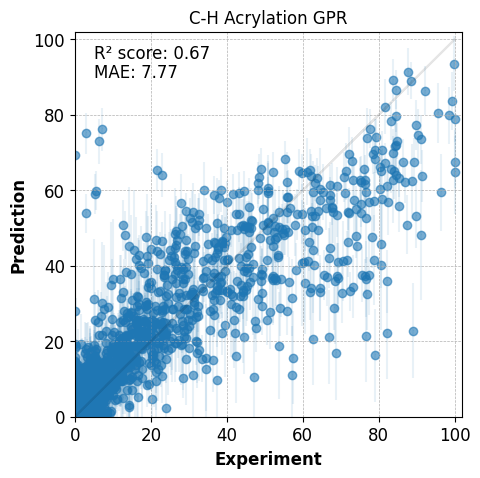

In [6]:
from sklearn.metrics import r2_score, mean_absolute_error

model, scaler_y = update_model(X_init, y_init,fit_y=False, bounds_norm=DATASET.bounds_norm, FIT_METHOD=True)


y_pred = model.posterior(X_candidate).mean.detach().flatten().numpy()
y_std = np.sqrt(model.posterior(X_candidate).variance.detach().flatten().numpy())

y_pred = y_pred.flatten()
y_candidate = y_candidate.flatten()


r2 = r2_score(y_pred, y_candidate)
mae = mean_absolute_error(y_candidate, y_pred)

print("Results from the GPR model")
print("train size = ", len(X_init))
print("test size = ", len(X_candidate))
print("r2 = ", r2)
print("N = ", len(X_init), "MAE = ", mae)


fig, ax = plt.subplots(1, 1, figsize=(5, 5))

dataset = "C-H Acrylation"


ax.set_title("{} GPR".format(dataset))
ax.errorbar(y_candidate, y_pred, yerr=y_std, marker=None, fmt=",", alpha=0.1)
ax.plot(y_candidate, y_candidate, color="black", alpha=0.1)
ax.scatter(y_candidate, y_pred, alpha=0.6)
# Setting the axis limits
ax.set_xlim(0, 102)
ax.set_ylim(0, 102)
ax.text(
    5, 95, f"R² score: {r2:.2f}", fontsize=12
)  # Adjust position and fontsize as needed
ax.text(5, 90, f"MAE: {mae:.2f}", fontsize=12)  # Adjust position and fontsize as needed
ax.grid(True, which="both", linestyle="--", linewidth=0.5)
ax.tick_params(axis="both", which="major", labelsize=12)
ax.set_xlabel("Experiment", fontsize=12, fontweight="bold")
ax.set_ylabel("Prediction", fontsize=12, fontweight="bold")
plt.savefig(f"correlation_{dataset}_GPR.pdf")

However, in real experimental settings often only a few data points for a handful of ligands are availible. In the extremecase only a single ligand was investigated. Therefore we use a different initialization scheme in which only a single ligand was tested, here corresponding to the one with the worst yield across all reaction conditions corresponding to the `worst_ligand` flag.

In [7]:
DATASET = Evaluation_data(
    "BMS",
    200,
    "update_ligand_when_used",
    init_strategy="worst_ligand",
)


(
    X_init,
    y_init,
    costs_init,
    X_candidate,
    y_candidate,
    costs_candidate,
    LIGANDS_init,
    LIGANDS_candidate,
    price_dict,
    exp_init,
    exp_candidate,
) = DATASET.get_init_holdout_data(111)

###############################################
Entries of X are not between 0 and 1. Adding MinMaxScaler to the pipeline.
###############################################


`X_init` are the representation vectors of the initial experiments and `y_init` are the corresponding yield measurements. 


`costs_init` contains an array of all the costs for the ligands for the initially collected data

`X_candidate` and `y_candidate` are representation vectors and measurements of the holdoutset respectively

`price_dict` is a dictionary of the current prices. Note that the inital ligand was already set to zero price as it was acquired before.

`exp_init` and `exp_candidate` are the experimental conditions corresponding to their vector `X_init` and `X_candidate` respectively.

Next we will just show a simple example how to perform a Cost-informed Bayesion optimization with CIBO. First we create a dictionary that covers all the parameters for the Bayesian optimization. We select the Direct Arylation dataset with the `BMS` keyword. As mentioned before, we start with the `worst_ligand` and set the `cost_aware` flat to `True`. Use `False` for normal BO.

To use the modified acquisition funciton as in the paper use the `minus` flag as well as the `NEI` acquisition function.


In [8]:
confs =[{
    "dataset": "BMS",
    "init_strategy": "worst_ligand",
    "cost_aware": True,
    "n_runs": 5,
    "n_iter": 12,
    "batch_size": 5,
    "ntrain": 200,
    "prices": "update_ligand_when_used",
    "surrogate": "GP",
    "acq_func": "NEI",
    "label": "BMS_COST_GP_NEI",
    "cost_mod": "minus",
},
{
    "dataset": "BMS",
    "init_strategy": "worst_ligand",
    "cost_aware": False,
    "n_runs": 5,
    "n_iter": 12,
    "batch_size": 5,
    "ntrain": 200,
    "prices": "update_ligand_when_used",
    "surrogate": "GP",
    "acq_func": "NEI",
    "label": "BMS_NORMAL_GP_NEI",
    "cost_mod": "minus",
}]


In [9]:
from utils import (
    create_aligned_transposed_price_table,
    data_dict_BO_LIGAND,
    data_dict_RS_LIGAND,
)
from experiments import (
    BO_LIGAND,
    BO_COI_LIGAND,
    RS_LIGAND,
)


RESULTS = {}

for conf in confs:

    print("Starting experiment: ", conf)
    y_better_BO_ALL, y_better_RANDOM_ALL = [], []
    running_costs_BO_ALL, running_costs_RANDOM_ALL = [], []

    DATASET = Evaluation_data(
        conf["dataset"],
        conf["ntrain"],
        conf["prices"],
        init_strategy=conf["init_strategy"],
    )
    bounds_norm = DATASET.bounds_norm
    N_RUNS = conf["n_runs"]
    NITER = conf["n_iter"]
    BATCH_SIZE = conf["batch_size"]
    SURROGATE = conf["surrogate"]
    COST_AWARE_BO = conf["cost_aware"]

    for run in range(N_RUNS):
        SEED = 111 + run
        random.seed(SEED)
        np.random.seed(SEED)
        torch.manual_seed(SEED)

        (
            X_init,
            y_init,
            costs_init,
            X_candidate,
            y_candidate,
            costs_candidate,
            LIGANDS_init,
            LIGANDS_candidate,
            price_dict,
            exp_init,
            exp_candidate,
        ) = DATASET.get_init_holdout_data(SEED)

        print(create_aligned_transposed_price_table(price_dict))
        X, y = cp.deepcopy(X_init), cp.deepcopy(y_init)
        y_best = float(torch.max(y))
        model, scaler_y = update_model(X, y, bounds_norm, surrogate=SURROGATE)
        X_candidate_FULL, y_candidate_FULL = cp.deepcopy(X_candidate), cp.deepcopy(
            y_candidate
        )
        X_candidate_BO = cp.deepcopy(X_candidate)
        y_candidate_BO = cp.deepcopy(y_candidate)
        exp_candidate_BO = cp.deepcopy(exp_candidate)


        y_candidate_RANDOM = cp.deepcopy(y_candidate).detach().numpy()
        exp_candidate_RANDOM = cp.deepcopy(exp_candidate)

        running_costs_BO = [0]
        running_costs_RANDOM = [0]

        price_dict_BO = cp.deepcopy(price_dict)
        price_dict_RANDOM = cp.deepcopy(price_dict)

        LIGANDS_candidate_BO = cp.deepcopy(LIGANDS_candidate)
        LIGANDS_candidate_RANDOM = cp.deepcopy(LIGANDS_candidate)

        y_better_BO = []
        y_better_RANDOM = []

        y_better_BO.append(y_best)
        y_better_RANDOM.append(y_best)
        y_best_BO, y_best_RANDOM = y_best, y_best

        BO_data = data_dict_BO_LIGAND(
            model,
            y_best_BO,
            scaler_y,
            X,
            y,
            X_candidate_BO,
            y_candidate_BO,
            LIGANDS_candidate_BO,
            y_better_BO,
            price_dict_BO,
            running_costs_BO,
            bounds_norm,
            BATCH_SIZE,
            None,
            SURROGATE,
            conf["acq_func"],
            exp_init,
            exp_candidate_BO,
        )

        BO_data["cost_mod"] = conf["cost_mod"]

        RANDOM_data = data_dict_RS_LIGAND(
            y_candidate_RANDOM,
            y_best_RANDOM,
            LIGANDS_candidate_RANDOM,
            price_dict_RANDOM,
            BATCH_SIZE,
            None,
            y_better_RANDOM,
            running_costs_RANDOM,
            exp_init,
            exp_candidate_RANDOM,
        )

        for i in range(NITER):
            if COST_AWARE_BO == False:
                BO_data = BO_LIGAND(BO_data)
            else:
                BO_data = BO_COI_LIGAND(BO_data)

            RANDOM_data = RS_LIGAND(RANDOM_data)

            print("--------------------")
            print(
                "# |{}/{}|\tBO {:.2f}\tRS {:.2f} \tSUM(COSTS BO): ${}\tSUM(COSTS RS): ${}\tN_train {}".format(
                    i + 1,
                    NITER,
                    BO_data["y_best_BO"],
                    RANDOM_data["y_best_RANDOM"],
                    BO_data["running_costs_BO"][-1],
                    RANDOM_data["running_costs_RANDOM"][-1],
                    BO_data["N_train"],
                )
            )
            print(create_aligned_transposed_price_table(price_dict_BO))

        y_better_BO_ALL.append(BO_data["y_better_BO"])
        y_better_RANDOM_ALL.append(RANDOM_data["y_better_RANDOM"])
        running_costs_BO_ALL.append(BO_data["running_costs_BO"])
        running_costs_RANDOM_ALL.append(RANDOM_data["running_costs_RANDOM"])

    y_better_BO_ALL = np.array(y_better_BO_ALL)
    y_better_RANDOM_ALL = np.array(y_better_RANDOM_ALL)


    if conf["cost_aware"] == True:
        RESULTS["CIBO"] = { "y_better": y_better_BO_ALL, "running_costs": running_costs_BO_ALL}
    else:
        RESULTS["BO"] = { "y_better": y_better_BO_ALL, "running_costs": running_costs_BO_ALL}
        RESULTS["RANDOM"] = { "y_better": y_better_RANDOM_ALL, "running_costs": running_costs_RANDOM_ALL}

Starting experiment:  {'dataset': 'BMS', 'init_strategy': 'worst_ligand', 'cost_aware': True, 'n_runs': 5, 'n_iter': 12, 'batch_size': 5, 'ntrain': 200, 'prices': 'update_ligand_when_used', 'surrogate': 'GP', 'acq_func': 'NEI', 'label': 'BMS_COST_GP_NEI', 'cost_mod': 'minus'}
###############################################
Entries of X are not between 0 and 1. Adding MinMaxScaler to the pipeline.
###############################################
Ligand 1  | Ligand 2  | Ligand 3  | Ligand 4  | Ligand 5  | Ligand 6  | Ligand 7  | Ligand 8  | Ligand 9  | Ligand 10 | Ligand 11 | Ligand 12
---------------------------------------------------------------------------------------------------------------------------------------------
22.0      | 102.0     | 36.0      | 24.0      | 144.0     | 800.0     | 297.0     | 552.0     | 0         | 8.0       | 1.0       | 72.0     
--------------------
# |1/12|	BO 89.71	RS 53.61 	SUM(COSTS BO): $9.0	SUM(COSTS RS): $427.0	N_train 149
Ligand 1  | Ligand 2  |

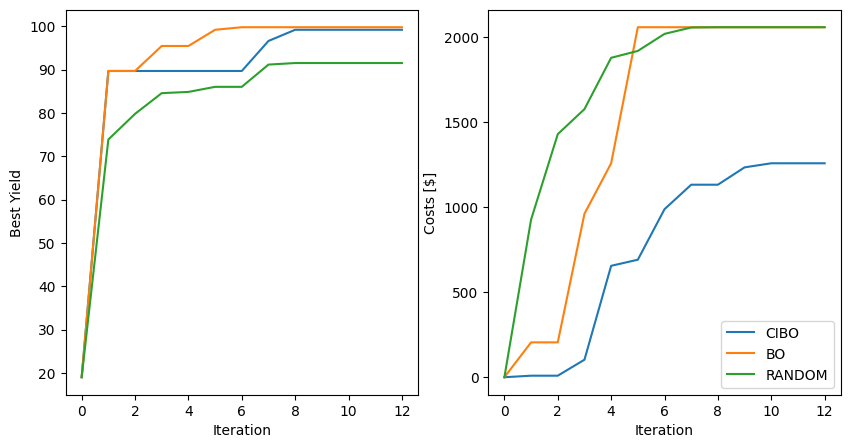

In [17]:
CIBO = np.mean(RESULTS["CIBO"]["y_better"], axis=0)
BO = np.mean(RESULTS["BO"]["y_better"], axis=0)

CIBO_COST = np.mean(RESULTS["CIBO"]["running_costs"], axis=0)
BO_COST = np.mean(RESULTS["BO"]["running_costs"], axis=0)


RANDOM = np.mean(y_better_RANDOM_ALL, axis=0)
RANDOM_COST = np.mean(running_costs_RANDOM_ALL, axis=0)


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(CIBO, label="CIBO")
ax[0].plot(BO, label="BO")
ax[0].plot(RANDOM, label="RANDOM")


ax[1].plot(CIBO_COST, label="CIBO")
ax[1].plot(BO_COST, label="BO")
ax[1].plot(RANDOM_COST, label="RANDOM")




ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Best Yield")

ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("Costs [$]")


plt.legend()
plt.show()

Now we discuss how to use the code for your own dataset! All that is needed is a CSV file with the following naming conventions for the columns

- As before `Ligand_Cost` is the cost per gram of each ligand

- `Base_SMILES`,`Ligand_SMILES` and `Solvent_SMILES` are the SMILES strings of basis, ligand and solvent respectively

- Finally, the `Concentration`, reaction temperature in degree celcius `Temp_C` and the yield `Yield`


In the next we show a chunk of such dataframe with the corresponding convention

In [1]:
import pandas as pd

# Define the data as a dictionary
data_dict = {
    "Ligand_Cost_fixed": [1.0, 552.0, 102.0],
    "Base_SMILES": [
        "CC(C)(C)C(=O)[O-].[K+]",
        "CC(C)(C)C(=O)[O-].[Cs+]",
        "CC(C)(C)C(=O)[O-].[K+]",
    ],
    "Ligand_SMILES": [
        "c1ccc(P(c2ccccc2)c2ccccc2)cc1",
        "COc1ccc(OC)c(P(c2cc(C(F)(F)F)cc(C(F)(F)F)c2)c2cc(C(F)(F)F)cc(C(F)(F)F)c2)c1-c1c(C(C)C)cc(C(C)C)cc1C(C)C",
        "CC(C)(C)P(c1ccccc1)C(C)(C)C",
    ],
    "Solvent_SMILES": ["Cc1ccc(C)cc1", "CC(=O)N(C)C", "Cc1ccc(C)cc1"],
    "Concentration": [0.1, 0.153, 0.1],
    "Temp_C": [105, 120, 90],
    "Yield": [1.41, 5.65, 0.0],
}

# Load the dictionary into a DataFrame
df = pd.DataFrame(data_dict)

# Display the DataFrame
print(df)

   Ligand_Cost_fixed              Base_SMILES  \
0                1.0   CC(C)(C)C(=O)[O-].[K+]   
1              552.0  CC(C)(C)C(=O)[O-].[Cs+]   
2              102.0   CC(C)(C)C(=O)[O-].[K+]   

                                       Ligand_SMILES Solvent_SMILES  \
0                      c1ccc(P(c2ccccc2)c2ccccc2)cc1   Cc1ccc(C)cc1   
1  COc1ccc(OC)c(P(c2cc(C(F)(F)F)cc(C(F)(F)F)c2)c2...    CC(=O)N(C)C   
2                        CC(C)(C)P(c1ccccc1)C(C)(C)C   Cc1ccc(C)cc1   

   Concentration  Temp_C  Yield  
0          0.100     105   1.41  
1          0.153     120   5.65  
2          0.100      90   0.00  


Next, we load the full dataframe 

In [5]:
from datasets import user_data

#change the path to whereever you keep your data
my_data_path = "./data/user_data.csv"

user_data(csv_file=my_data_path)

In [8]:
DATASET = Evaluation_data(
    "user_data",
    11111,
    "update_ligand_when_used",
    init_strategy="worst_ligand",
    csv_file=my_data_path,
)


(
    X_init,
    y_init,
    costs_init,
    X_candidate,
    y_candidate,
    costs_candidate,
    LIGANDS_init,
    LIGANDS_candidate,
    price_dict,
    exp_init,
    exp_candidate,
) = DATASET.get_init_holdout_data(111)

###############################################
Entries of X are not between 0 and 1. Adding MinMaxScaler to the pipeline.
###############################################


In [9]:
len(X_init)


144